In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [201]:
X, true_labels, true_centers = make_blobs(n_samples=150, centers=3, n_features=2,
                  random_state=0, return_centers=True)

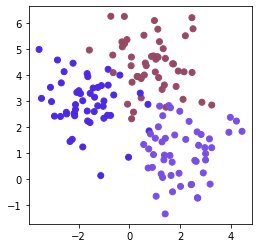

In [203]:
def visualize_clasters(X, labels, n_clusters=3):
    unique_labels = np.unique(labels)
    unique_colors = np.random.random((len(unique_labels), 3))
    colors = [unique_colors[l] for l in labels]
    plt.figure(figsize=(4, 4))
    plt.scatter(X[:, 0], X[:, 1], c=colors)
#     centroids = KMeans(n_clusters=n_clusters).fit(X)
#     plt.scatter(centroids[:, 0], centroids[:, 1], marker=r'$\clubsuit$')
    plt.show()
visualize_clasters(X, true_labels)

In [204]:
class KMeans:
    def __init__(self, n_clusters, init='random', max_iter=100):
        self.max_iter = max_iter
        self.init = init
        self.n_clusters = n_clusters
        self.centroids = np.array([])

    def fit(self, X: np.array, y=None):
        if self.init == 'random':
            centroids_init = np.random.rand(self.n_clusters, len(X[0]))
            for _ in range(self.max_iter):

                closest_centers = np.array([np.argmin(
                    [np.linalg.norm(point - center)
                            for center in centroids_init])
                                    for point in X])

                self.centroids = [np.mean(
                        np.array([X[i] for i in range(len(X))
                                  if closest_centers[i] == j]), axis=0)
                                                        for j in range(self.n_clusters)]
                centroids_init = self.centroids

    def predict(self, X: np.array):

        labels = [np.argmin(
            [np.linalg.norm(point - center)
                            for center in self.centroids])
                                    for point in X]
        return np.array(labels)

In [205]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(kmeans.centroids)
print(true_centers)

[array([-1.77259918,  3.01451431]), array([0.91467877, 4.37467272]), array([2.08307872, 1.00752133])]
[[ 0.97627008  4.30378733]
 [ 2.05526752  0.89766366]
 [-1.52690401  2.91788226]]


[0 1 2 2 0 2 2 0 1 2 0 0 1 2 2 1 1 0 1 0 2 0 2 2 1 0 0 2 1 0 1 1 1 1 2 0 0
 0 2 2 1 1 2 0 0 0 1 0 1 2 2 2 2 0 0 1 2 0 1 2 1 2 1 1 2 2 2 2 1 2 2 0 0 2
 0 2 2 1 1 2 0 0 1 2 0 0 0 1 1 0 0 2 0 2 0 0 1 1 0 0 0 0 1 0 0 2 1 2 2 2 1
 2 0 1 2 1 2 2 1 1 2 0 2 1 2 0 1 0 1 1 1 1 0 1 1 0 2 1 0 1 2 2 0 0 2 1 1 1
 0 0]
[1 0 0 0 1 0 0 1 2 0 1 2 2 0 0 2 2 1 2 1 0 1 0 0 2 1 1 0 2 1 2 2 2 2 0 1 1
 1 0 0 2 2 0 1 1 1 2 0 2 0 1 0 0 1 1 2 0 1 2 0 2 2 2 2 0 2 0 1 0 0 0 1 1 0
 1 0 0 2 2 0 1 1 0 0 1 1 1 2 2 1 1 0 1 0 1 0 2 2 1 1 1 1 2 1 1 0 2 0 0 0 2
 0 1 2 0 2 0 0 2 2 0 1 0 0 1 1 2 1 2 2 2 2 1 2 2 2 0 2 1 2 0 0 1 1 2 2 2 2
 1 1]


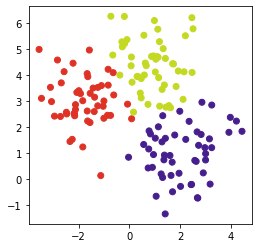

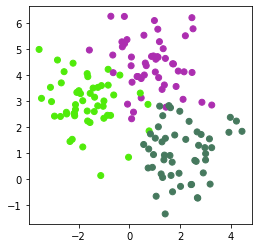

In [206]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.predict(X)
print(labels)
print(true_labels)
visualize_clasters(X, labels)
visualize_clasters(X, true_labels)

In [207]:
err = np.sum(abs(labels - true_labels))/150*100
print(f"Error : {round(err)} %" )


Error : 127 %


In [212]:
from sklearn.cluster import KMeans as KMeans1
kmeans1 = KMeans1(n_clusters=3)
kmeans1.fit(X)
print(kmeans1.cluster_centers_)
print(true_centers)


[[ 0.91563959  4.44602508]
 [-1.73388472  3.00577412]
 [ 2.07417555  1.04097145]]
[[ 0.97627008  4.30378733]
 [ 2.05526752  0.89766366]
 [-1.52690401  2.91788226]]


In [213]:
labels1 = kmeans1.predict(X)
print(labels1)
print(true_labels)

[2 1 0 0 2 0 0 2 1 0 2 2 1 0 0 1 1 2 1 2 0 2 0 0 1 2 2 0 1 2 1 1 1 1 0 2 2
 2 0 0 1 1 0 2 2 2 1 2 1 0 2 0 0 2 2 1 0 2 1 0 1 0 1 1 0 0 0 0 1 0 0 2 2 0
 2 0 0 1 1 0 2 2 1 0 2 2 2 1 1 2 2 0 2 0 2 2 1 1 2 2 2 2 1 2 2 0 1 0 0 0 1
 0 2 1 0 1 0 0 1 1 0 2 0 1 0 2 1 2 1 1 1 1 2 1 1 2 1 1 2 1 0 0 2 2 0 1 1 1
 2 2]
[1 0 0 0 1 0 0 1 2 0 1 2 2 0 0 2 2 1 2 1 0 1 0 0 2 1 1 0 2 1 2 2 2 2 0 1 1
 1 0 0 2 2 0 1 1 1 2 0 2 0 1 0 0 1 1 2 0 1 2 0 2 2 2 2 0 2 0 1 0 0 0 1 1 0
 1 0 0 2 2 0 1 1 0 0 1 1 1 2 2 1 1 0 1 0 1 0 2 2 1 1 1 1 2 1 1 0 2 0 0 0 2
 0 1 2 0 2 0 0 2 2 0 1 0 0 1 1 2 1 2 2 2 2 1 2 2 2 0 2 1 2 0 0 1 1 2 2 2 2
 1 1]


In [215]:
err1 = np.sum(abs(labels1 - true_labels))/150*100
print(f"Error : {(err1)} %" )


Error : 73.33333333333333 %


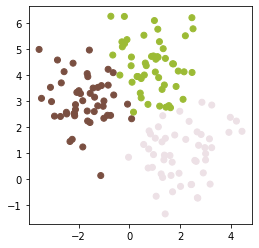

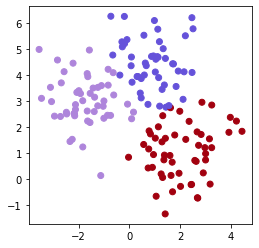

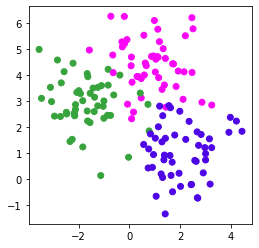

In [217]:
visualize_clasters(X, labels)
visualize_clasters(X, labels1)
visualize_clasters(X, true_labels)
